In [1]:
import tfscreen
from tfscreen.plot import heatmap
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

## Categorizer

Functions to fit values vs. IPTG to extract hill fits and categorize theta profiles

In [2]:
theta_file = "/Users/harmsm/Desktop/keep/theta_df.csv"

# Load dataframe and make genotype into categorical
df = tfscreen.util.read_dataframe(theta_file)
df = tfscreen.genetics.set_categorical_genotype(df)

In [3]:

# Grab wildtype
wt_df = df[df["genotype"] == "wt"]

# This fits a bunch of models to the curve and returns three outputs (shown below)
every_model_dict, fit_summary_df, pred_df = tfscreen.analysis.cat_response(
    wt_df,
    x_column="titrant_conc",
    y_column="theta_est",
    y_std_column="theta_std",
    models_to_run=None # <- put a list here to fit specific models
)

# Summarize all fit results. This holds the best model and AIC weights for 
# all models. the w_{model_name} columns sum to 1, with the best model being
# the highest value.
fit_summary_df

  0%|          | 0/1 [00:00<?, ?it/s]

,best_model,best_model_R2,best_model_AIC_weight,status,w_hill_repressor,w_biphasic_dip,w_repressor,w_bell_peak,w_biphasic_peak,w_inducer,w_hill_inducer,w_flat,w_linear,w_bell_dip
genotype,,,,,,,,,,,,,,
wt,hill_repressor,0.994272,0.6919,partial,0.6919,0.281145,0.019937,0.007017,5.671054e-09,2.013119e-09,7.405850e-10,NaN,NaN,NaN


In [4]:
# This holds the predicted outputs for each model
pred_df

,model,x,y,y_std,is_best_model,genotype
genotype,,,,,,
wt,repressor,0.000000,1.811362,0.043156,False,wt
wt,repressor,0.000045,1.808650,0.042729,False,wt
wt,repressor,0.000050,1.808331,0.042679,False,wt
wt,repressor,0.000056,1.807974,0.042623,False,wt
wt,repressor,0.000062,1.807575,0.042561,False,wt
...,...,...,...,...,...,...
wt,biphasic_dip,1.607166,0.744420,0.063730,False,wt
wt,biphasic_dip,1.796989,0.748664,0.067487,False,wt
wt,biphasic_dip,2.009233,0.752614,0.071171,False,wt


In [5]:
# This is a dictionary holding the model fit parameters. 
print(list(every_model_dict.keys()))
# Get hill repressor fit parameters
every_model_dict["hill_repressor"]

['flat', 'linear', 'repressor', 'inducer', 'hill_repressor', 'hill_inducer', 'bell_peak', 'bell_dip', 'biphasic_peak', 'biphasic_dip']


,baseline_est,amplitude_est,lnK_est,n_est,baseline_std,amplitude_std,lnK_std,n_std,is_best_model,R2,AIC_weight
genotype,,,,,,,,,,,
wt,1.769253,-1.062476,-3.983937,1.599359,0.026398,0.050152,0.118223,0.258348,True,0.994272,0.6919


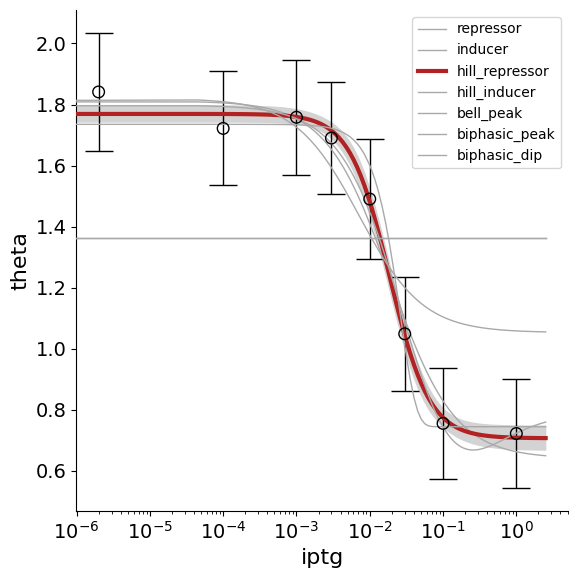

In [6]:
# Plot all model fits. 
fig, ax = tfscreen.plot.cat_fits(wt_df["titrant_conc"],
                                 wt_df["theta_est"],
                                 wt_df["theta_std"],
                                 pred_df,
                                 xlog=True,
                                 xlabel="iptg",
                                 ylabel="theta")
#fig.savefig("name-of-file.pdf")

In [7]:
# Fit first 500 lines of dataframe. The outputs will now have information for
# many genotypes

df_fit_dict, df_fit_summary, df_pred_df = tfscreen.analysis.cat_response(
    df.loc[:500], # set to 'df' to fit everything. will take hours.
    x_column="titrant_conc",
    y_column="theta_est",
    y_std_column="theta_std",
    models_to_run=None # <- put a list here to fit specific models. Otherwise, do all.
)

# Print all genotypes where a biphasic_dip is the best model 
df_fit_summary[df_fit_summary["best_model"] == "biphasic_dip"]

  0%|          | 0/63 [00:00<?, ?it/s]

,best_model,best_model_R2,best_model_AIC_weight,status,w_hill_repressor,w_biphasic_dip,w_repressor,w_bell_peak,w_biphasic_peak,w_inducer,w_hill_inducer,w_flat,w_linear,w_bell_dip
genotype,,,,,,,,,,,,,,
H29A,biphasic_dip,0.996209,0.925128,partial,0.063974,0.925128,0.010652,0.000246,1.631985e-09,5.151958e-10,1.895298e-10,NaN,NaN,2.258205e-09
H29C,biphasic_dip,0.993019,0.591123,partial,0.362091,0.591123,0.044920,0.001867,1.127510e-08,3.782018e-09,1.391326e-09,NaN,NaN,1.524419e-08
H29F,biphasic_dip,0.988058,0.837965,partial,0.096131,0.837965,0.058930,0.006974,1.159453e-07,4.611339e-08,1.696418e-08,NaN,NaN,4.341344e-08
H29I,biphasic_dip,0.930729,0.425129,partial,0.172320,0.425129,0.342237,0.060229,3.464191e-05,2.652940e-05,9.759621e-06,NaN,NaN,1.500064e-05
H29N,biphasic_dip,0.990670,0.426227,partial,0.278963,0.426227,0.293909,0.000901,2.396559e-08,8.730875e-09,3.211909e-09,NaN,NaN,NaN
H29P,biphasic_dip,0.981340,0.827209,partial,0.066056,0.827209,0.099756,0.006977,4.973665e-07,2.701885e-07,9.939700e-08,NaN,NaN,1.571131e-06
H29S,biphasic_dip,0.977300,0.419584,partial,0.233457,0.419584,0.311249,0.035709,5.864957e-07,3.015630e-07,1.109388e-07,NaN,NaN,2.963969e-07
H29T,biphasic_dip,0.960777,0.376488,partial,0.200017,0.376488,0.357642,0.065842,3.925618e-06,2.411915e-06,8.872938e-07,NaN,NaN,2.198232e-06
H29V,biphasic_dip,0.973468,0.418904,partial,0.177395,0.418904,0.385847,0.017852,9.753728e-07,5.615644e-07,2.065879e-07,NaN,NaN,5.152269e-07


In [ ]:
# get all hill fits
hill_fits = df_fit_dict["hill_repressor"]

# Plot histograms of values for all fits
fig, ax = plt.subplots(1,2,figsize=(12,6),sharey=True)
ax[0].hist(hill_fits["lnK_est"])
ax[0].set_xlabel("lnK")
ax[0].set_ylabel("counts")

ax[1].hist(hill_fits["n_est"])
ax[1].set_xlabel("n")

hill_fits